In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#list_of_tickers = ["MJ", 'SPY']
#end_date= datetime.now()
#start_date= end_date + timedelta(-365)
#tickers_df= get_historical_data(list_of_tickers, start_date, end_date, output_format="pandas", columns='close')
#tickers_df.head()

MJ                                   SPY                  \
             open   high    low  close   volume    open    high     low   
date                                                                      
2018-09-21  42.70  42.86  39.23  39.50  2412714  293.09  293.22  291.81   
2018-09-24  38.32  39.86  37.35  39.27  1311741  291.34  291.50  290.37   
2018-09-25  40.80  40.95  39.20  39.36  1106105  291.53  291.65  290.48   
2018-09-26  40.05  40.15  38.74  38.94   892297  290.91  292.24  289.41   
2018-09-27  39.00  39.24  38.21  38.72   979067  290.41  291.91  290.10   

                               
             close     volume  
date                           
2018-09-21  291.99  105479656  
2018-09-24  291.02   53409645  
2018-09-25  290.75   44370037  
2018-09-26  289.88   79739674  
2018-09-27  290.69   59249455

In [5]:
tickers_df.to_csv("MJ_index_data")

In [6]:
tickers_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
tickers_df.head()

,MJ,SPY
,close,close
date,,
2018-09-21,39.50,291.99
2018-09-24,39.27,291.02
2018-09-25,39.36,290.75
2018-09-26,38.94,289.88
2018-09-27,38.72,290.69


In [7]:
#calculate 2 year returns for indexes and drop nulls
df_daily_returns = tickers_df.pct_change().dropna()
df_daily_returns.head()

,MJ,SPY
,close,close
date,,
2018-09-24,-0.005823,-0.003322
2018-09-25,0.002292,-0.000928
2018-09-26,-0.010671,-0.002992
2018-09-27,-0.005650,0.002794
2018-09-28,0.034349,0.000103


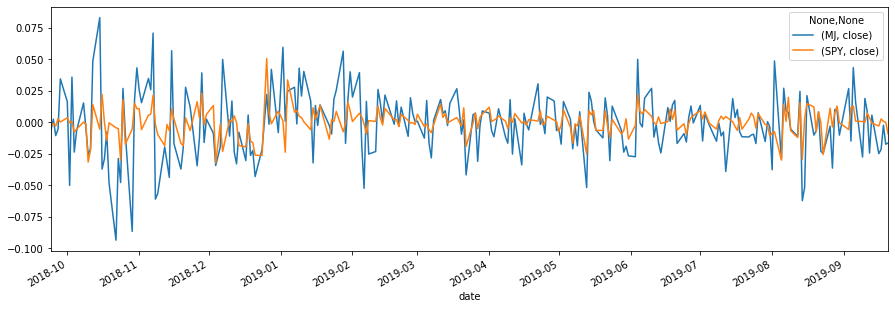

In [8]:
# Plot daily retuns for indexes
df_daily_returns.plot(figsize=(15,5));

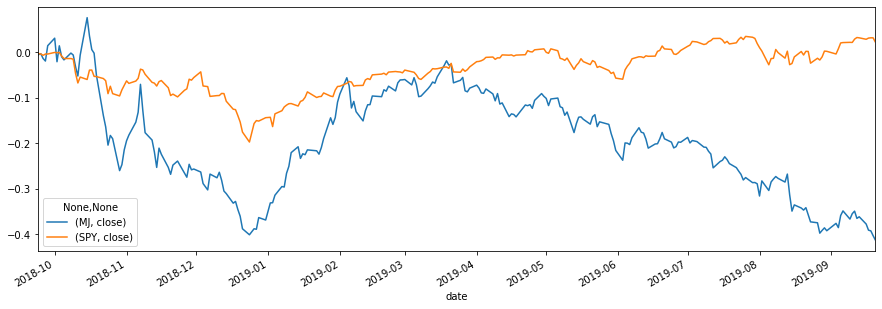

In [10]:
# Plot cumulative returns for the indexes
cumulative_returns_indexes = (1 + df_daily_returns).cumprod() - 1
cumulative_returns_indexes.plot(figsize=(15,5));


In [11]:
# Daily Standard Deviations if indexes
# Calculate the standard deviation for each portfolio. 
indexes_daily_std= cumulative_returns_indexes.std()
indexes_daily_std.sort_values(ascending=False)

MJ   close    0.111247
SPY  close    0.047031
dtype: float64